Table of contents

1. Create bare-bones minerva model

2. Replicate original paper finding (requires better interface)

3. Create rhythm/tone experiment with fixed
    - rhythm/tone split
    - number participants
    - participant stimuli

4. Make experiment configurable

5. Run a bazillion experiments

# Bare-bones Minerva2 model

In [1]:
import numpy as np

In [2]:
len([val for val in np.unique(np.array((1,0,-1,1, 1, 1, 1, 0))) if val not in (-1, 0, 1)])

0

## The Model (v0.1)

In [3]:
class Minerva2:
    def __init__(self, features_per_trace):
        self.features_per_trace = features_per_trace
        self.model = []
        
    def get_activation(self, probe, trace):
        '''
        also returns similarity in 2nd return value
        '''
        # the @ symbol denotes a "dot product," which is the same as 
        # similarity = sum([probe[i] * self.model[trace_idx][i] for i in range(len(probe))])
        similarity = (probe @ trace) / len(probe)
        return similarity**3, similarity
        
    def get_activation_by_idx(self, probe, trace_idx):
        return self.get_activation(probe, self.model[trace_idx], return_sim)
    
    def get_echo_intensity(self, probe, return_all=False):
        activations = []
        similarities = []
        for trace in self.model:
            activation, similarity = self.get_activation(probe, trace)
            activations.append(activation)
            similarities.append(similarity)
        
        if return_all:
            return sum(activations) / len(activations), activations, similarities
        else:
            return sum(activations) / len(activations)
    
    def add_trace(self, trace):
        if type(trace) != np.ndarray:
            raise Exception("Trace is not of type numpy array, fail.")
        if trace.shape != (self.features_per_trace,):
            raise Exception("Trace is not a one-dimensional array of length", self.features_per_trace, ", fail.")
        if len([x for x in trace if x not in (-1, 0, 1)]) > 0:
            raise Exception("Trace contains values besides -1, 0, or 1, fail.")
        self.model.append(trace)

    def pretty_print(self, probe):
        '''
        Illustrates the calculation of echo intensity
        '''
        echo_intensity, activations, similarities = self.get_echo_intensity(probe, return_all=True)

        print('PROBE:', list(probe))
        for i in range(len(activations)):
            print('TRACE {}:'.format(i), list(self.model[i]), '->', '{:>6.3f}^3 = {:>8.3f}'.format(similarities[i], activations[i]))
        print('-'*80)
        print('{:>80.3f}'.format(echo_intensity))

## Try it out with some ZERO traces

In [4]:
model1_fpt = 10

In [5]:
model1 = Minerva2(model1_fpt)

In [6]:
for _ in range(10):
    rand_trace = np.zeros(model1_fpt)
    model1.add_trace(rand_trace)

In [7]:
model1.model

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]

Let's create a random probe to test

In [8]:
probe1 = np.random.randint(-1, 2, model1_fpt)
probe1

array([ 0,  1, -1,  0,  0, -1,  1,  1,  0, -1])

In [9]:
model1.get_echo_intensity(probe1, return_all=True)

(0.0,
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [10]:
model1.pretty_print(probe1)

PROBE: [0, 1, -1, 0, 0, -1, 1, 1, 0, -1]
TRACE 0: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ->  0.000^3 =    0.000
TRACE 1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ->  0.000^3 =    0.000
TRACE 2: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ->  0.000^3 =    0.000
TRACE 3: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ->  0.000^3 =    0.000
TRACE 4: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ->  0.000^3 =    0.000
TRACE 5: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ->  0.000^3 =    0.000
TRACE 6: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ->  0.000^3 =    0.000
TRACE 7: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ->  0.000^3 =    0.000
TRACE 8: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ->  0.000^3 =    0.000
TRACE 9: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ->  0.000^3 =    0.000
--------------------------------------------------------------------------------
                                                

Blank memory means a blank response! Looking good so far.

## Now test with random traces

In [11]:
model2_fpt = 8

In [12]:
model2 = Minerva2(model2_fpt)

In [13]:
for _ in range(12):
    rand_trace = np.random.randint(-1, 2, model2_fpt)
    model2.add_trace(rand_trace)

In [14]:
model2.model

[array([-1,  1, -1,  0,  1,  0, -1, -1]),
 array([ 0,  0, -1, -1,  1, -1,  0, -1]),
 array([ 0, -1,  0,  0, -1, -1,  0,  0]),
 array([ 0,  1,  1,  0,  0,  1,  0, -1]),
 array([-1,  0,  0,  1,  0, -1,  0,  1]),
 array([ 1,  1,  0,  1,  0, -1,  0,  0]),
 array([ 0,  1,  0,  1,  0, -1, -1,  0]),
 array([-1, -1,  1, -1,  1, -1,  1,  1]),
 array([ 0,  0,  1,  1,  1,  0, -1, -1]),
 array([-1, -1,  0,  1,  0,  0,  0, -1]),
 array([ 1, -1,  1,  1, -1,  1,  0,  1]),
 array([ 1, -1, -1, -1, -1, -1, -1, -1])]

And a random test probe...

In [15]:
probe2 = np.random.randint(-1, 2, model2_fpt)
probe2

array([-1,  1,  1,  1,  1,  0,  1, -1])

In [16]:
model2.get_echo_intensity(probe2, return_all=True)

(-0.010904947916666666,
 [0.015625,
  0.0,
  -0.015625,
  0.052734375,
  0.001953125,
  0.001953125,
  0.001953125,
  0.001953125,
  0.052734375,
  0.015625,
  -0.015625,
  -0.244140625],
 [0.25,
  0.0,
  -0.25,
  0.375,
  0.125,
  0.125,
  0.125,
  0.125,
  0.375,
  0.25,
  -0.25,
  -0.625])

In [17]:
model2.pretty_print(probe2)

PROBE: [-1, 1, 1, 1, 1, 0, 1, -1]
TRACE 0: [-1, 1, -1, 0, 1, 0, -1, -1] ->  0.250^3 =    0.016
TRACE 1: [0, 0, -1, -1, 1, -1, 0, -1] ->  0.000^3 =    0.000
TRACE 2: [0, -1, 0, 0, -1, -1, 0, 0] -> -0.250^3 =   -0.016
TRACE 3: [0, 1, 1, 0, 0, 1, 0, -1] ->  0.375^3 =    0.053
TRACE 4: [-1, 0, 0, 1, 0, -1, 0, 1] ->  0.125^3 =    0.002
TRACE 5: [1, 1, 0, 1, 0, -1, 0, 0] ->  0.125^3 =    0.002
TRACE 6: [0, 1, 0, 1, 0, -1, -1, 0] ->  0.125^3 =    0.002
TRACE 7: [-1, -1, 1, -1, 1, -1, 1, 1] ->  0.125^3 =    0.002
TRACE 8: [0, 0, 1, 1, 1, 0, -1, -1] ->  0.375^3 =    0.053
TRACE 9: [-1, -1, 0, 1, 0, 0, 0, -1] ->  0.250^3 =    0.016
TRACE 10: [1, -1, 1, 1, -1, 1, 0, 1] -> -0.250^3 =   -0.016
TRACE 11: [1, -1, -1, -1, -1, -1, -1, -1] -> -0.625^3 =   -0.244
--------------------------------------------------------------------------------
                                                                          -0.011


### Do this a bunch to see what random traces and probes produce

In [18]:
import matplotlib.pyplot as plt

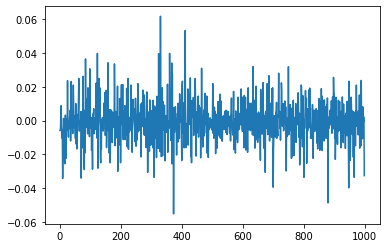

In [19]:
intensities = []
for i in range(1000):
    probe2 = np.random.randint(-1, 2, model2_fpt)
    intensities.append(model2.get_echo_intensity(probe2))
plt.plot(intensities)

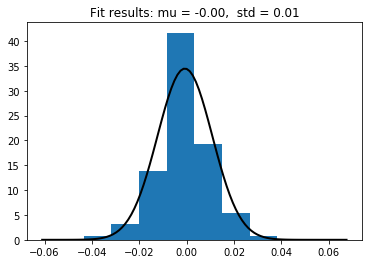

In [20]:
from scipy.stats import norm

mu, std = norm.fit(intensities)

plt.hist(intensities, density=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

Good enough.

# Hintzmann's original experiment

1. Create prototypes (no 0s)
2. Create exemplars which are 
3. ???
4. Profit.

# Mimic experiment 1

Participants received partial features (rhythm/tone) during study, then at test were given a full song.

We will simulate this by creating a list of random probes, `R`.

Memory traces will be added which contain zeros, and some subset of `R`.

We will be comparing trace/probe overlap amount on echo intensity.

In [21]:
model3_fpt = 10
model3_prototypes = 10
model3_rhythm_tone_ratio = 0.7
model3_noise_ratio = 0.5

In [22]:
model3 = Minerva2(model3_fpt)

## Make some random probes

In [23]:
Ps = np.random.randint(-1, 2, (model3_prototypes, model3_fpt))
Ps.shape

(10, 10)

In [24]:
Ps

array([[-1,  0, -1,  0, -1,  1,  0,  0,  0,  0],
       [ 0,  0, -1,  0,  0,  1,  0, -1, -1,  1],
       [ 0, -1,  0,  0,  0,  1, -1, -1, -1, -1],
       [ 0, -1,  0, -1, -1,  0,  0, -1, -1,  0],
       [ 1,  1,  0,  1,  0, -1,  0, -1,  1, -1],
       [ 0, -1,  1,  1, -1, -1, -1,  1, -1,  0],
       [ 1,  0,  0,  1,  0, -1, -1, -1, -1,  1],
       [-1, -1,  0, -1,  1,  1,  0,  1, -1, -1],
       [ 0,  1,  0,  1, -1, -1,  0,  1, -1,  1],
       [ 1, -1,  1,  0, -1,  0,  1,  0, -1,  1]])

## Make rhythm/tone traces

In [25]:
PT_split_index = round(model3_prototypes * model3_noise_ratio)

In [26]:
T_Rs = np.copy(Ps)[:PT_split_index]
T_Ts = np.copy(Ps)[:PT_split_index]

Zero out `proportion` of features

In [27]:
T_Rs.shape

(5, 10)

In [28]:
RT_split_index = round(model3_fpt * model3_rhythm_tone_ratio)

In [29]:
T_Rs[:, :RT_split_index] *= 0
T_Ts[:, RT_split_index:] *= 0

In [30]:
T_Rs

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, -1, -1,  1],
       [ 0,  0,  0,  0,  0,  0,  0, -1, -1, -1],
       [ 0,  0,  0,  0,  0,  0,  0, -1, -1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, -1,  1, -1]])

In [31]:
T_Ts

array([[-1,  0, -1,  0, -1,  1,  0,  0,  0,  0],
       [ 0,  0, -1,  0,  0,  1,  0,  0,  0,  0],
       [ 0, -1,  0,  0,  0,  1, -1,  0,  0,  0],
       [ 0, -1,  0, -1, -1,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  1,  0, -1,  0,  0,  0,  0]])

Only a certain number of these are kept, though (noise ratio)

## Add traces to model

In [32]:
for T_R in T_Rs:
    model3.add_trace(T_R)
for T_T in T_Ts:
    model3.add_trace(T_T)

In [33]:
model3.model

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([ 0,  0,  0,  0,  0,  0,  0, -1, -1,  1]),
 array([ 0,  0,  0,  0,  0,  0,  0, -1, -1, -1]),
 array([ 0,  0,  0,  0,  0,  0,  0, -1, -1,  0]),
 array([ 0,  0,  0,  0,  0,  0,  0, -1,  1, -1]),
 array([-1,  0, -1,  0, -1,  1,  0,  0,  0,  0]),
 array([ 0,  0, -1,  0,  0,  1,  0,  0,  0,  0]),
 array([ 0, -1,  0,  0,  0,  1, -1,  0,  0,  0]),
 array([ 0, -1,  0, -1, -1,  0,  0,  0,  0,  0]),
 array([ 1,  1,  0,  1,  0, -1,  0,  0,  0,  0])]

## Get echo intensities for all probes, splitting dis/similar

In [34]:
PRETTY=True

In [35]:
sim_intensities = []
dis_intensities = []
for i, P in enumerate(Ps):
    intensity = model3.get_echo_intensity(P)
    if i < PT_split_index:
        sim_intensities.append(intensity)
    else:
        dis_intensities.append(intensity)
    if PRETTY:
        model3.pretty_print(P)

PROBE: [-1, 0, -1, 0, -1, 1, 0, 0, 0, 0]
TRACE 0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] ->  0.000^3 =    0.000
TRACE 1: [0, 0, 0, 0, 0, 0, 0, -1, -1, 1] ->  0.000^3 =    0.000
TRACE 2: [0, 0, 0, 0, 0, 0, 0, -1, -1, -1] ->  0.000^3 =    0.000
TRACE 3: [0, 0, 0, 0, 0, 0, 0, -1, -1, 0] ->  0.000^3 =    0.000
TRACE 4: [0, 0, 0, 0, 0, 0, 0, -1, 1, -1] ->  0.000^3 =    0.000
TRACE 5: [-1, 0, -1, 0, -1, 1, 0, 0, 0, 0] ->  0.400^3 =    0.064
TRACE 6: [0, 0, -1, 0, 0, 1, 0, 0, 0, 0] ->  0.200^3 =    0.008
TRACE 7: [0, -1, 0, 0, 0, 1, -1, 0, 0, 0] ->  0.100^3 =    0.001
TRACE 8: [0, -1, 0, -1, -1, 0, 0, 0, 0, 0] ->  0.100^3 =    0.001
TRACE 9: [1, 1, 0, 1, 0, -1, 0, 0, 0, 0] -> -0.200^3 =   -0.008
--------------------------------------------------------------------------------
                                                                           0.007
PROBE: [0, 0, -1, 0, 0, 1, 0, -1, -1, 1]
TRACE 0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] ->  0.000^3 =    0.000
TRACE 1: [0, 0, 0, 0, 0, 0, 0, -1, -1, 1] ->

## Analyze

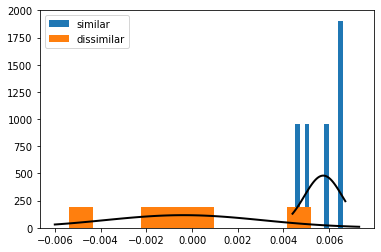

In [36]:
from scipy.stats import norm

mu, std = norm.fit(sim_intensities)

plt.hist(sim_intensities, density=True, label='similar')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
#title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
#plt.title(title)
mu, std = norm.fit(dis_intensities)

plt.hist(dis_intensities, density=True, label='dissimilar')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
#title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
#plt.title(title)
plt.legend()

plt.show()

## REPEAT!

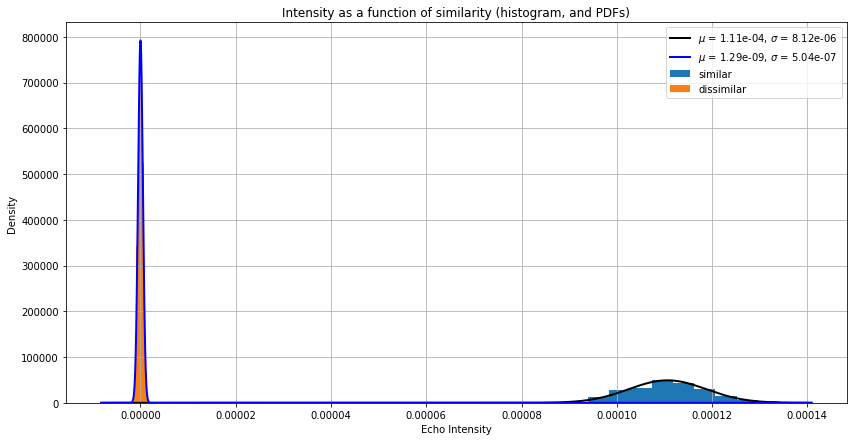

In [68]:
# tunable variables
FPT = 1000
N_PROTOTYPES = 1000
RHYTHM_TONE_RATIO = 0.7
NOISE_RATIO = 0.5

for _ in range(10):
    # create model
    model = Minerva2(FPT)
    # create probes
    Ps = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))
    PT_split_index = round(N_PROTOTYPES * NOISE_RATIO)

    # create traces (subset of probes)
    T_Rs = np.copy(Ps)[:PT_split_index]
    T_Ts = np.copy(Ps)[:PT_split_index]

    # zero out parts of traces (symmetrically)
    RT_split_index = round(FPT * RHYTHM_TONE_RATIO)

    T_Rs[:, :RT_split_index] *= 0
    T_Ts[:, RT_split_index:] *= 0

    # add traces to model
    for T_R in T_Rs:
        model.add_trace(T_R)
    for T_T in T_Ts:
        model.add_trace(T_T)

    # get echo intensities
    sim_intensities = []
    dis_intensities = []
    for i, P in enumerate(Ps):
        intensity = model.get_echo_intensity(P)
        if i < PT_split_index:
            sim_intensities.append(intensity)
        else:
            dis_intensities.append(intensity)

    # plot histograms and normal PDFs
    from scipy.stats import norm

    plt.figure(figsize=(14,7))

    mu1, std1 = norm.fit(sim_intensities)
    mu2, std2 = norm.fit(dis_intensities)

    plt.hist(sim_intensities, density=True, label='similar')
    plt.hist(dis_intensities, density=True, label='dissimilar')

    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 10000)

    p1 = norm.pdf(x, mu1, std1)
    plt.plot(x, p1, 'k',linewidth=2, label='$\mu$ = %.2e, $\sigma$ = %.2e' % (mu1, std1))

    p2 = norm.pdf(x, mu2, std2)
    plt.plot(x, p2, 'b', linewidth=2, label='$\mu$ = %.2e, $\sigma$ = %.2e' % (mu2, std2))

    plt.title("Intensity as a function of similarity (histogram, and PDFs)")
    plt.legend()
    plt.xlabel("Echo Intensity")
    plt.ylabel("Density")
    plt.grid(True)
    plt.show()
    
    break